# E-commerce Business Transaction

E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

# Question

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# Read the data using pandas

df = pd.read_csv('Sales_Transaction_v4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


Columns Additional Information:

- TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
- Product (categorical): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (categorical): a five-digit unique number that defines each customer.
- Country (categorical): name of the country where the customer resides.

# Preprocessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
# In this preprocessing step, I will not remove duplicate data to minimize the loss of transaction-related information

df[df.duplicated()].head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
985,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1365,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
1401,581538,12/9/2019,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1406,581538,12/9/2019,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1409,581538,12/9/2019,23343,Jumbo Bag Vintage Christmas,6.19,1,14446.0,United Kingdom


In [5]:
# Check for any missing values in the dataset

df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [6]:
# Remove rows with missing data, specifically in the CustomerNo column

df = df.dropna()
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [7]:
# Convert the Date column to the datetime data type for easier data analysis

dateFormat = '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536295 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536295 non-null  object        
 1   Date           536295 non-null  datetime64[ns]
 2   ProductNo      536295 non-null  object        
 3   ProductName    536295 non-null  object        
 4   Price          536295 non-null  float64       
 5   Quantity       536295 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536295 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [8]:
df.describe()

,Price,Quantity,CustomerNo
count,536295.000000,536295.000000,536295.000000
mean,12.662031,9.923902,15227.893178
std,8.490638,216.671641,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [9]:
# Rename some columns for clarity

df = df.rename(columns={'TransactionNo':'Id_Transaction','ProductNo':'Id_Product','ProductName':'Product','CustomerNo':'Id_Customer'})
df.head()

,Id_Transaction,Date,Id_Product,Product,Price,Quantity,Id_Customer,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


# Exploratory Data Analysis

### 1. How was the sales trend over the months?

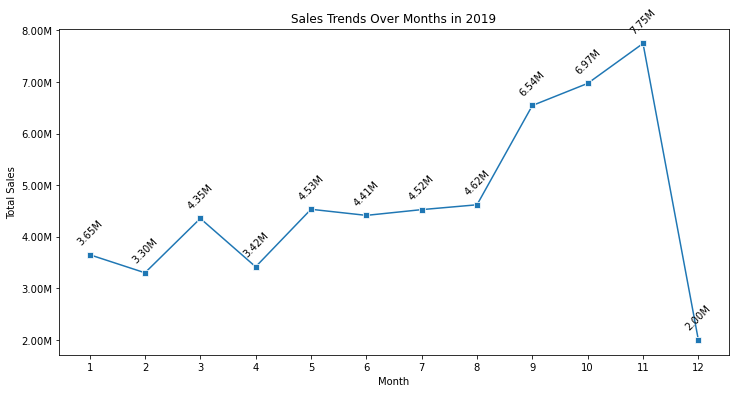

In [10]:
# Add a Total_Sales column by multiplying the values in the Quantity and Price columns
df['Total_Sales'] = df['Quantity'] * df['Price']

# Add Year and Month columns to observe data trends each month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Select data for the year 2019 to analyze the total sales trends monthly
total_sales = df[df['Year']==2019].groupby('Month')['Total_Sales'].sum().reset_index()

def format_millions_y(x, pos):
    return f'{x/1e6:.2f}M'

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Month', y='Total_Sales', data=total_sales, marker='s')
ax.yaxis.set_major_formatter(FuncFormatter(format_millions_y))
for index, row in total_sales.iterrows():
    plt.annotate(f'{row["Total_Sales"]/1e6:.2f}M', (row['Month'], row['Total_Sales']), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Months in 2019')
plt.xticks(range(1, 13))
plt.show()

The sales trend over the months in 2019 shows instability during the initial 5 months, followed by a consistent and steady increase from the 6th to the 11th month, which culminates in the highest total sales in the 11th month, totaling over 7.7 million pounds. However, it experiences a significant decline in the 12th month, with the lowest total sales at just over 1.9 million pounds.

### 2. What are the most frequently purchased products?

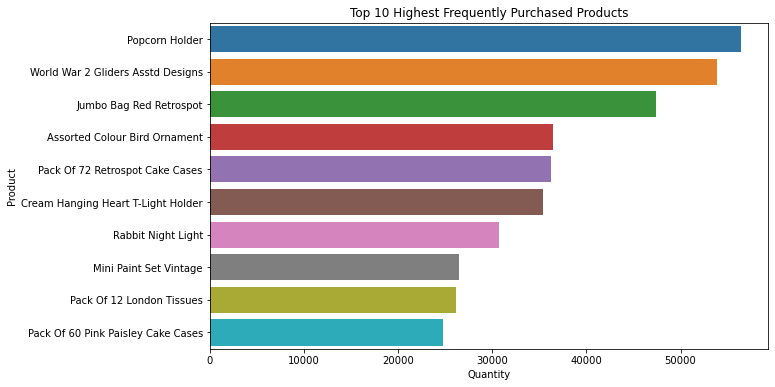

In [11]:
# Selecting products based on the quantity and sorting them accordingly
top_purchased_product = df.groupby(['Product'])['Quantity'].sum().reset_index()

# and then sort them in descending order for top 10 highest frequently purchased products
top_purchased_product = top_purchased_product.sort_values(by=['Quantity'], ascending = False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Product', data=top_purchased_product.head(10), palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Top 10 Highest Frequently Purchased Products')
plt.show()

The most frequently purchased products is the Popcorn Holder, with a total quantity of 56431 units purchased. This suggests that the Popcorn Holder is a highly popular product among customers and has achieved a significant level of sales in the dataset.

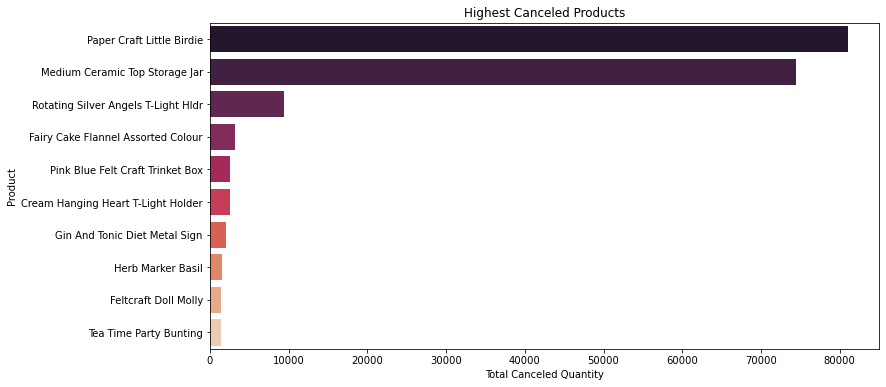

In [12]:
# Retrieving data of canceled products based on transactions with Quantity < 0 (negative) values and sorting them.
canceled_products = df[df['Quantity'] < 0].copy()
canceled_products.loc[:,'Quantity'] = abs(canceled_products['Quantity'])
total_canceled_quantity_per_product = canceled_products.groupby('Product')['Quantity'].sum().reset_index()

# and then sort them in descending order
total_canceled_quantity_per_product = total_canceled_quantity_per_product.sort_values(by=['Quantity'], ascending = False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Product', data=total_canceled_quantity_per_product.head(10), palette='rocket')
plt.xlabel('Total Canceled Quantity')
plt.ylabel('Product')
plt.title('Highest Canceled Products')
plt.show()

The products Paper Craft Little Birdie and Medium Ceramic Top Storage Jar experienced the highest number of cancellations. Specifically, Paper Craft Little Birdie had a total cancellation quantity of 80995 items, while Medium Ceramic Top Storage Jar had a total cancellation quantity of 74494 items.

### 3. How many products does the customer purchase in each transaction?

In [13]:
# To obtain the average number of products purchased per transaction
# we can filter the data to exclude canceled transactions (where Quantity > 0).

df_filtered = df[df['Quantity'] > 0]
average_quantity = round(df_filtered['Quantity'].mean())
print(f"Average Number of Products Purchased per Transaction : {average_quantity: }")

Average Number of Products Purchased per Transaction :  11


The result obtained from the average total product purchases per transaction is 11. It means that, on average, customers purchase 11 products in each transaction.

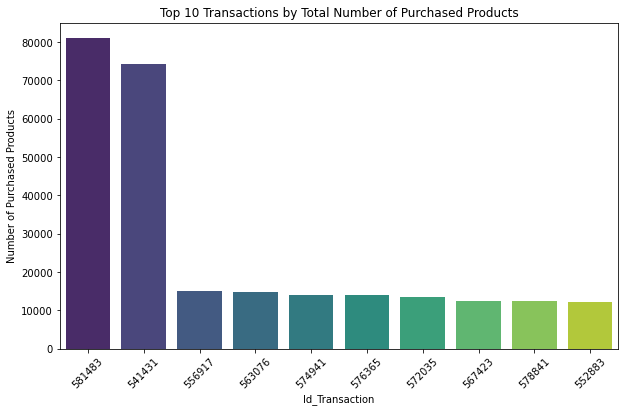

In [14]:
# To obtain the transaction IDs with the highest total purchased products 
# it can group the data by transaction IDs and sum the Quantity for each transaction
total_purchased_per_transaction = df.groupby('Id_Transaction')['Quantity'].sum().reset_index()

# and then sort them in descending order for top 10 transactions by total number of purchased products 
top_10 = total_purchased_per_transaction.sort_values(by='Quantity', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Id_Transaction', y='Quantity', palette='viridis')
plt.xlabel('Id_Transaction')
plt.ylabel('Number of Purchased Products')
plt.title('Top 10 Transactions by Total Number of Purchased Products')
plt.xticks(rotation=45)
plt.show()

The highest product purchase per transaction is recorded in Transaction ID 581483, where the total product purchase reaches 80995 items.

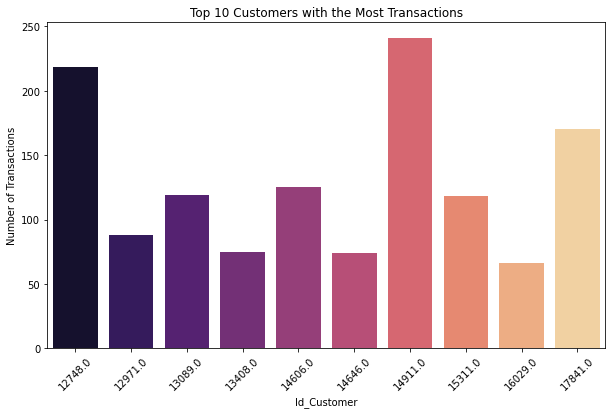

In [15]:
# To obtain the customers with the highest number of transactions
# it can group the data by customer IDs and count the unique transaction IDs for each customer
top_10_customers = df.groupby('Id_Customer')['Id_Transaction'].nunique().reset_index()

# and then sort them in descending order for top 10 customers with the most transactions
top_10_customers = top_10_customers.sort_values(by='Id_Transaction', ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Id_Customer', y='Id_Transaction', data=top_10_customers, palette='magma')
plt.title('Top 10 Customers with the Most Transactions')
plt.xlabel('Id_Customer')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

The customer with the highest number of transactions is identified by Customer ID 14911, with a total of 241 transactions.

### 4. What are the most profitable segment customers?

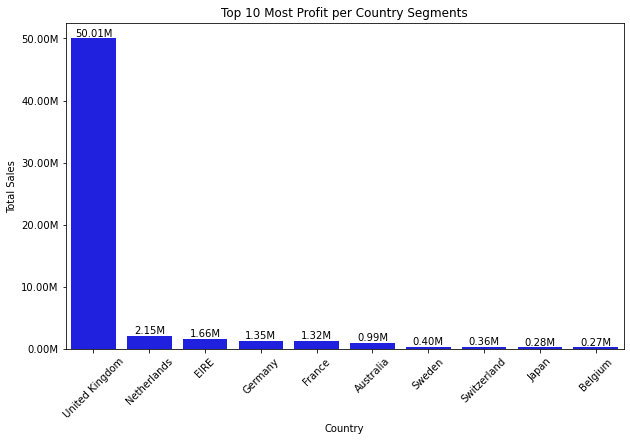

In [16]:
# To obtain the segments or countries with the highest total sales, 
# it can group the data by country and sum the total sales for each country. 
profit_per_segment = df.groupby('Country')['Total_Sales'].sum().reset_index()

# and then sort them in descending order for top 10 most profit per country segments
profit_per_segment = profit_per_segment.sort_values(by='Total_Sales', ascending=False).head(10)

def format_millions(value, _):
    return f'{value/1e6:.2f}M'

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='Total_Sales', data=profit_per_segment, color="blue")
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format_millions(height, None), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Most Profit per Country Segments')
plt.xticks(rotation=45)
plt.show()

The United Kingdom stands out as the top-performing country in terms of profitability, generating over 50 million pounds sterling in profit. It has a substantial lead in profitability compared to other countries.

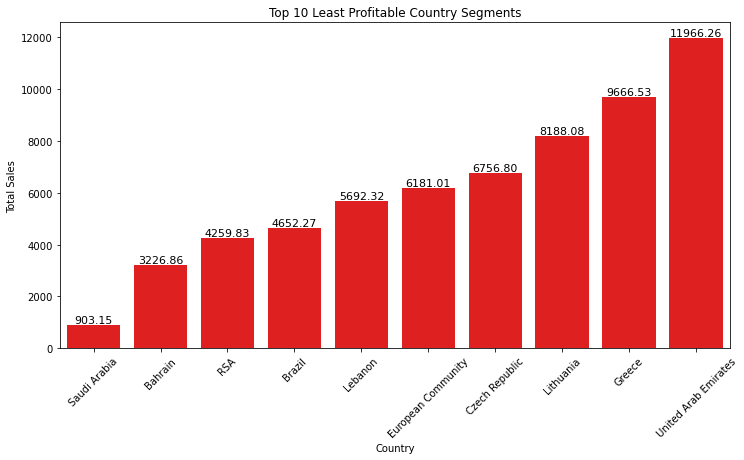

In [17]:
# this is for the least profitable country based on the lowest total sales
least_profitable = df.groupby('Country')['Total_Sales'].sum().reset_index()
least_profitable = least_profitable.sort_values(by='Total_Sales')
least_profitable = least_profitable.head(10)

# Visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Total_Sales', data=least_profitable, color='red')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Least Profitable Country Segments')
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

On the other end of the spectrum, Saudi Arabia is the least profitable country segment, with only 903.15 pounds sterling in profit. It lags significantly behind other segments in terms of profitability.

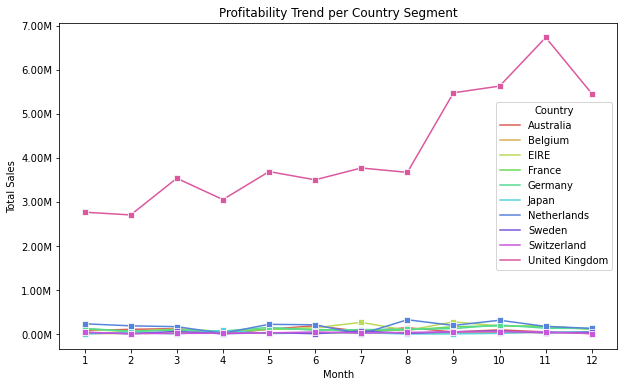

In [18]:
# Calculate profit per customer segment per month
profit_per_month = df.groupby(['Country', df['Month']])['Total_Sales'].sum().reset_index()
most_profitable_segments = df.groupby('Country')['Total_Sales'].sum().reset_index()
most_profitable_segments = most_profitable_segments.sort_values(by='Total_Sales', ascending=False).head(10)
most_profitable_segments = most_profitable_segments['Country'].tolist()

# Filter the data to include only the most profitable segments
top_most_profitable_segments = profit_per_month[profit_per_month['Country'].isin(most_profitable_segments)]

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Total_Sales', hue='Country', data=top_most_profitable_segments, palette='hls', marker='s')
ax.yaxis.set_major_formatter(FuncFormatter(format_millions_y))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Profitability Trend per Country Segment')
plt.xticks(range(1, 13))
plt.show()

The profitability trend in the United Kingdom is noteworthy. It shows a dramatic increase in profitability starting from August and continuing through November. This period marks a significant upturn in profit generation, unlike other countries, which do not exhibit significant fluctuations in profitability.

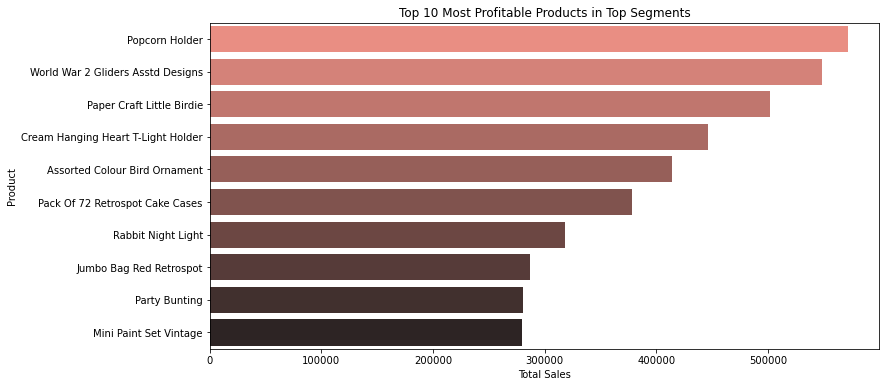

In [19]:
# Calculate total sales per product for the most profitable customer segments
# Filter the data to include only the segments identified as the most profitable
profit_per_product = df[df['Country'].isin(most_profitable_segments)]['Total_Sales'].groupby(df['Product']).sum().reset_index()

# Sort the result by total sales in descending order
profit_per_product = profit_per_product.sort_values(by='Total_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Sales', y='Product', data=profit_per_product, palette='dark:salmon_r')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top 10 Most Profitable Products in Top Segments')
plt.show()

The product that contributes the most to profitability is the Popcorn Holder, with a total sales of 571.242 pounds sterling. This product appears to be a major driver of profitability in the analyzed segments.

### 5. Based on your findings, what strategy could you recommend to the business to gain more profit?

1. Focus on Top Products: Prioritize and promote high-demand products like the "Popcorn Holder" to boost sales.
2. Optimize Sales Timing: Concentrate marketing efforts during months of increasing sales and offer promotions during slower months to maintain customer interest.
3. Customer Engagement: Implement loyalty programs and personalized marketing to retain high-value customers.
4. Market Expansion: Explore new markets, especially in less profitable regions like Saudi Arabia, using tailored strategies.
5. Product Diversification: Introduce related products to encourage additional purchases.
6. Discounts and Promotions: Use discounts and promotions strategically to stimulate demand.
7. Cost Control: Streamline operations and negotiate supplier deals to reduce costs.
8. Data-Driven Decisions: Utilize data analytics for insights into trends and customer preferences.

Also To address the issue of high cancellations of transactions and products, it is recommended to investigate the reasons behind these cancellations and implement measures to reduce them, potentially including improving product descriptions or packaging, and providing better customer support. These strategies can enhance profitability by optimizing sales, customer engagement, and cost management. Regular evaluation and adjustments are crucial for long-term success.